<a href="https://colab.research.google.com/github/SanghunOh/study_machinglearning/blob/main/codes/shingeonui/report/homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1_1) 2차원 데이터가 100개로 이뤄진 C1,C2 생성, 2차원 평면상에 산점도 표시 
C1: 평균=[0;0], 공분산=[4,0;0,4]
C2: 평균=[3;5], 공분산=[3,0;0,5]

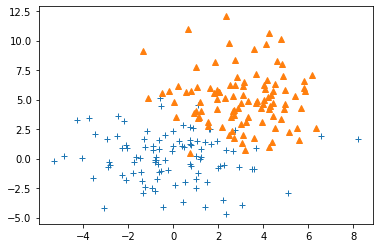

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
import numpy as np

np.random.seed(2)
row_count = 100

mean_c1 = np.array([0,0])                                   # class c1 평균행렬
cov_c1 = np.array([[4,0],[0,4]])                            # class c1 공분산행렬
rand_std_c1 = np.random.randn(row_count, 2)                 # class c1 난수 
class_c1 = rand_std_c1 @ np.sqrt(cov_c1) + mean_c1          # class c1 데이터


mean_c2 = np.array([3,5])                                   # class c2 평균행렬
cov_c2 = np.array([[3,0],[0,5]])                            # class c2 공분산행렬
rand_std_c2 = np.random.randn(row_count, 2)                 # class c2 난수
class_c2 = rand_std_c2 @ np.sqrt(cov_c2) + mean_c2          # class c2 데이터

mean_c1,cov_c1,class_c1.shape
mean_c2,cov_c2,class_c2.shape

line1 = plt.plot(class_c1[:,0], class_c1[:,1], marker='+', linestyle='None')
line2 = plt.plot(class_c2[:,0], class_c2[:,1], marker='^', linestyle='None')

Q1_2) 새로운 데이터 x = [1;2]에 대해
 1) 클래스 공통 공분산행렬을 가정한 경우
 2) 일반적인 공분산행렬을 가정한 경우
각각의 판별함수에 의해 어디에 속하는지

In [ ]:
k = 2 # 클래스 숫자
new_data = np.array([1,2])


sample_mean_c1 = np.mean(class_c1,axis=0).transpose()      #class c1의 표본 평균 행렬
sample_cov_c1 = np.cov(class_c1.T).transpose()             #class c1의 공분산 행렬

sample_mean_c2 = np.mean(class_c2,axis=0)    #class c2의 표본 평균 행렬
sample_cov_c2 = np.cov(class_c2.T)           #class c2의 공분산 행렬

a_mean = (sample_cov_c1 +sample_cov_c2)/k    #클래스별 표본 공분산들의 전체 평균

#1) 클래스 공통 공분산행렬을 가정한 판별함수
d_1 = (new_data-sample_mean_c1).T@np.linalg.inv(a_mean)@(new_data-sample_mean_c1)
d_2 = (new_data-sample_mean_c2).T@np.linalg.inv(a_mean)@(new_data-sample_mean_c2)
if d_1 < d_2:
    print(d_1,"에 따라 새로운 데이터", new_data,"는 class_c1에 속한다.")
elif d_1>d_2:
    print(d_2,"에 따라 새로운 데이터", new_data,"는 class_c2에 속한다.")
else:    
    print("새로운 데이터의 분류에 실패했다.")

#2) 일반적인 공분산행렬을 가정한 판별함수
d_1 = (new_data-sample_mean_c1).T@np.linalg.inv(sample_cov_c1)@(new_data-sample_mean_c1)+np.log(np.linalg.det(sample_cov_c1))
d_2 = (new_data-sample_mean_c2).T@np.linalg.inv(sample_cov_c2)@(new_data-sample_mean_c2)+np.log(np.linalg.det(sample_cov_c2))

if d_1 < d_2:
    print(d_1,"에 따라 새로운 데이터", new_data,"는 class_c1에 속한다.")
elif d_1>d_2:
    print(d_2,"에 따라 새로운 데이터", new_data,"는 class_c2에 속한다.")
else:    
    print("새로운 데이터의 분류에 실패했다.")

1.0788598239500367 에 따라 새로운 데이터 [1 2] 는 class_c1에 속한다.
4.202368615472042 에 따라 새로운 데이터 [1 2] 는 class_c1에 속한다.


Q2) 각 클래스당 데이터 50개씩 총 3개의 클래스로 이뤄진 iris 데이터 load 및 K-근접이웃 분류기를 이용하여 iris 데이터 분류.

조건 1: 데이터 간 거리 계산은 유클리디안 거리 사용

조건 2: K 값을 1, 5, 10, 15, 20, 25, 30 각각 수행

In [ ]:
import scipy.io as sc
import math
mat = sc.loadmat("iris/matlab_iris_shuffle.mat")            #.mat 데이터 로드

class_temp_a = []
class_temp_b = []
class_temp_c = []

iris_data_row = mat['iris_data'].shape[0]               
iris_data_colum = mat['iris_data'].shape[1]

for i in range(iris_data_row):                              #.mat 데이터를 Python에서 간단히 쓸 수 있도록 정리
    class_sel = math.floor(mat['iris_class'][i][0])
    data_array_list = []
    for j in range(iris_data_colum):
        data_array_list.append(float(mat['iris_data'][i][j]))
    if class_sel == 1:
        class_temp_a.append(data_array_list)
    elif class_sel == 2:
        class_temp_b.append(data_array_list)
    elif class_sel == 3:
        class_temp_c.append(data_array_list)    

class_a = np.array(class_temp_a)                            #.mat에서 데이터의 클래스가 1인 경우 class_a로 분류
class_b = np.array(class_temp_b)                            #.mat에서 데이터의 클래스가 2인 경우 class_b로 분류
class_c = np.array(class_temp_c)                            #.mat에서 데이터의 클래스가 3인 경우 class_c로 분류

class_vstack = np.vstack([class_a, class_b, class_c])       #교재와 같은 알고리즘을 사용하기 위해 각 클래스를 하나의 행렬로 합침

k_list = [1,5,10,15,20,25,30]                               #문제의 조건에 따르기 위해 K 값을 리스트로 만듦
for k in range(len(k_list)):
    Etrain = 0
    for i in range(len(class_vstack)):
        distance_list = []
        for j in range(len(class_vstack)):
            if i == j :                                                         #같은 데이터의 거리를 비교하는 경우를 제외
                continue
            distance = np.linalg.norm(class_vstack[i]-class_vstack[j],2)        #거리 함수는 유클리드 거리 사용
            distance_list.append([distance,j])
    
        distance_list.sort(key=lambda x:x[0])                   #K값 만큼 인접한 순위를 뽑기 위해 정렬
        count = [0,0,0]                                         #투표 진행
        for j in range(k_list[k]):
            if distance_list[j][1] < len(class_a):
                count[0] = count[0]+1
            elif distance_list[j][1] >= len(class_a) and distance_list[j][1] < len(class_a)+len(class_b):
                count[1] = count[1]+1
            elif distance_list[j][1] >= len(class_a)+len(class_b) and distance_list[j][1] < len(class_a)+len(class_b)+len(class_c):
                count[2] = count[2]+1
        
        tmp = max(count)
        index = count.index(tmp)                               #투표 공개
       
        if index == 0:                                         #클래스가 class_a로 분류되었으나, 실제 class_a에 속하지 않은 경우
            if not(i <len(class_a)) :
                Etrain = Etrain+1
        elif index ==1:                                        #클래스가 class_b로 분류되었으나, 실제 class_b에 속하지 않은 경우
            if not( i >= len(class_a) and i < len(class_a)+len(class_b)):
                Etrain = Etrain+1
        else:                                                  #클래스가 class_c로 분류되었으나, 실제 class_c에 속하지 않은 경우
            if not( i >= len(class_a)+len(class_b) and i < len(class_a)+len(class_b)+len(class_c)):
                Etrain = Etrain+1
    
    Error_rate = Etrain/(class_vstack.shape[0])
    print(k_list[k],"의 Error rate: ",Error_rate*100, "%")

1 의 Error rate:  4.0 %
5 의 Error rate:  3.3333333333333335 %
10 의 Error rate:  3.3333333333333335 %
15 의 Error rate:  2.666666666666667 %
20 의 Error rate:  2.0 %
25 의 Error rate:  3.3333333333333335 %
30 의 Error rate:  5.333333333333334 %


결론: 분류를 수행한 결과, K 값이 20일 때 학습 오류가 가장 적다. 